In [34]:
# This notebook analyzes a dataset from an employer tracking employee retention over time.

import pandas as pd
import seaborn as sns
from dataprep.eda import plot, plot_correlation, plot_missing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats





# Data Import and Cleaning

In [35]:
# read data
path= 'WA_Fn-UseC_-HR-Employee-Attrition.csv'

raw_data = pd.read_csv(path)

print(raw_data.shape)
#print first few rows
raw_data.head()

(1470, 35)


Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [36]:
raw_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [37]:
raw_data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [38]:
# processed data will be called "hr_data"
hr_data=raw_data

##  Outliers

Filter to rows with atleast one outlier, calssified as having a z score >3.  The z-score measures how many standard deviations a value is from the mean.  There are 80 rows with an outlier in atleast one column, no rows have an outlier in every row.  The extreme values are interpreted as extreme but likely correct.  During model specification it would be prudent to evaluate the sentivity of model health to the inclusion of outliers. 

In [39]:

# Check for outliers
numeric_data = hr_data.select_dtypes(include='number')

hr_outliers=numeric_data[(np.abs(stats.zscore(numeric_data)) > 3).any(axis=1)].sort_values(by=['Age'], inplace=False)



#outlier dimensions
print(hr_outliers.shape)

# see first few outliers
hr_outliers.head()

(83, 26)


Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
635    35        607                 9          3              1   
64     36       1223                 8          3              1   
752    36        885                16          4              1   
386    37       1107                14          3              1   
1430   38        201                10          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
635              880                        4          66               2   
64                83                        3          59               3   
752             1042                        3          43               4   
386              515                        4          95               3   
1430            2015                        2          99               1   

      JobLevel  ...  RelationshipSatisfaction  StandardHours  \
635          3  ...                         2             80   
64           3  ...                         2             80   
752          1  ...                         3             80   
386          1  ...                         3             80   
1430         3  ...                         1             80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
635                  1                 17                      2   
64                   3                 17                      2   
752                  0                 18                      1   
386                  1                 18                      2   
1430                 1                 20                      3   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
635                 3              17                  14   
64                  3              17                  14   
752                 3              17                  13   
386                 2              18                   7   
1430                3              18                  16   

      YearsSinceLastPromotion  YearsWithCurrManager  
635                         5                    15  
64                         12                     8  
752                        15                    14  
386                        12                    17  
1430                        1                    11  

[5 rows x 26 columns]

In [40]:
numeric_data.head()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                 0   
1                         4             80                 1   
2                         2             80                 0   
3                         3             80                 0   
4                         4             80                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 26 columns]

### Plot  outliers

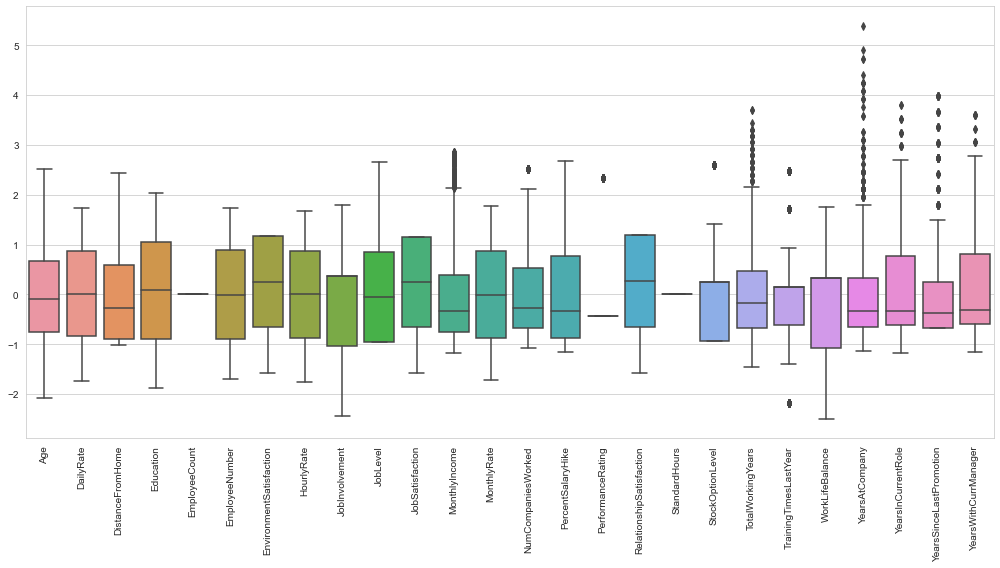

In [41]:
# Plot of outliers.  OUtliers are considered values with a Z score >=3.  The values are >=3 standard deviations from the mean value.
df_features = numeric_data
attrition_status =   hr_data[hr_data.columns[1]]
#df_features.describe()


scaler = StandardScaler()
scaled_features =scaler.fit_transform(df_features.values)
df_features_scaled = pd.DataFrame(scaled_features, index=df_features.index, columns=df_features.columns)

plt.figure(figsize=(14,8))
sns.boxplot( data = df_features_scaled )
# sns.boxplot(y=col,x="Attrition", data=raw_data, hue="Attrition", palette=my_pal)
plt.xticks(rotation=90)  

plt.tight_layout()

## Change Column Types

In [42]:
# Change select columns to categorical from integer.
# The following variables are currently continuous but should be converted to objects or ordinal character types.

cols = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "RelationshipSatisfaction", "StockOptionLevel"]
hr_data[cols] = hr_data[cols].astype('category')

In [43]:
hr_data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1         2  Life Sciences              1               1   
1                 8         1  Life Sciences              1               2   
2                 2         2          Other              1               4   
3                 3         4  Life Sciences              1               5   
4                 2         1        Medical              1               7   

   ... RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                        1            80                 0   
1  ...                        4            80                 1   
2  ...                        2            80                 0   
3  ...                        3            80                 0   
4  ...                        4            80                 1   

  TotalWorkingYears TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                     0               1               6   
1                10                     3               3              10   
2                 7                     3               3               0   
3                 8                     3               3               8   
4                 6                     3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [44]:
#check categorical levels for completeness and spelling
categorical = hr_data.select_dtypes(exclude=['int64'])



# check that the unique values in each column appear legitimate
for col in categorical:
    print(categorical[col].unique())

# check counts and unique counts
categorical.describe()


['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
[2, 1, 4, 3, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
[2, 3, 4, 1]
Categories (4, int64): [1, 2, 3, 4]
['Female' 'Male']
[3, 2, 4, 1]
Categories (4, int64): [1, 2, 3, 4]
[2, 1, 3, 4, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']
['Y']
['Yes' 'No']
[1, 4, 2, 3]
Categories (4, int64): [1, 2, 3, 4]
[0, 1, 3, 2]
Categories (4, int64): [0, 1, 2, 3]


Attrition BusinessTravel              Department  Education  \
count       1470           1470                    1470       1470   
unique         2              3                       3          5   
top           No  Travel_Rarely  Research & Development          3   
freq        1233           1043                     961        572   

       EducationField  EnvironmentSatisfaction Gender  JobInvolvement  \
count            1470                     1470   1470            1470   
unique              6                        4      2               4   
top     Life Sciences                        3   Male               3   
freq              606                      453    882             868   

        JobLevel          JobRole MaritalStatus Over18 OverTime  \
count       1470             1470          1470   1470     1470   
unique         5                9             3      1        2   
top            1  Sales Executive       Married      Y       No   
freq         543              326           673   1470     1054   

        RelationshipSatisfaction  StockOptionLevel  
count                       1470              1470  
unique                         4                 4  
top                            3                 0  
freq                         459               631

  0%|          | 0/346 [00:00<?, ?it/s]


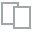
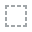
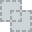
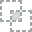
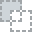
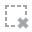
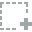
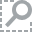
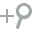
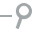
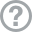
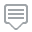
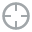
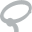
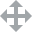
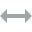
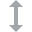
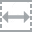
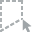
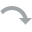
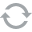
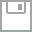
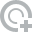
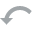
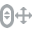
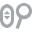
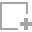
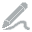
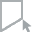
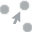
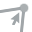
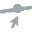

In [45]:
plot_missing(hr_data)

## Discussion
The dataframe is in good order, The data have 1470 records and 35 columns. The columns describe professional properties of individuals; time in a role, time since last promotion, educations, etc. and whether or not they have left the company (attrition).  Several columns recorded as integers were better represented as categoricals.  This will be important when we build plots.
The data were checked for outliers.  Although 

### Outliers
the dataset was filtered  to rows with atleast one outlier, classified as having a z score >3. The z-score measures how many standard deviations a value is from the mean. There are 80 rows with an outlier in atleast one column, no rows have an outlier in every row. The extreme values are interpreted as extreme but likely correct. During model specification it would be prudent to evaluate the sentivity of model health to the inclusion of outliers.

### Data Types
Most columns were correctly classified with the exception of a few categorical columns that were incorrectly specifed as intergers (Job class, salary grade, etc.)

### Missingness
There are no missing values in the dataset.  Imputation is unnecesary.

# Exploratory Data Analysis 

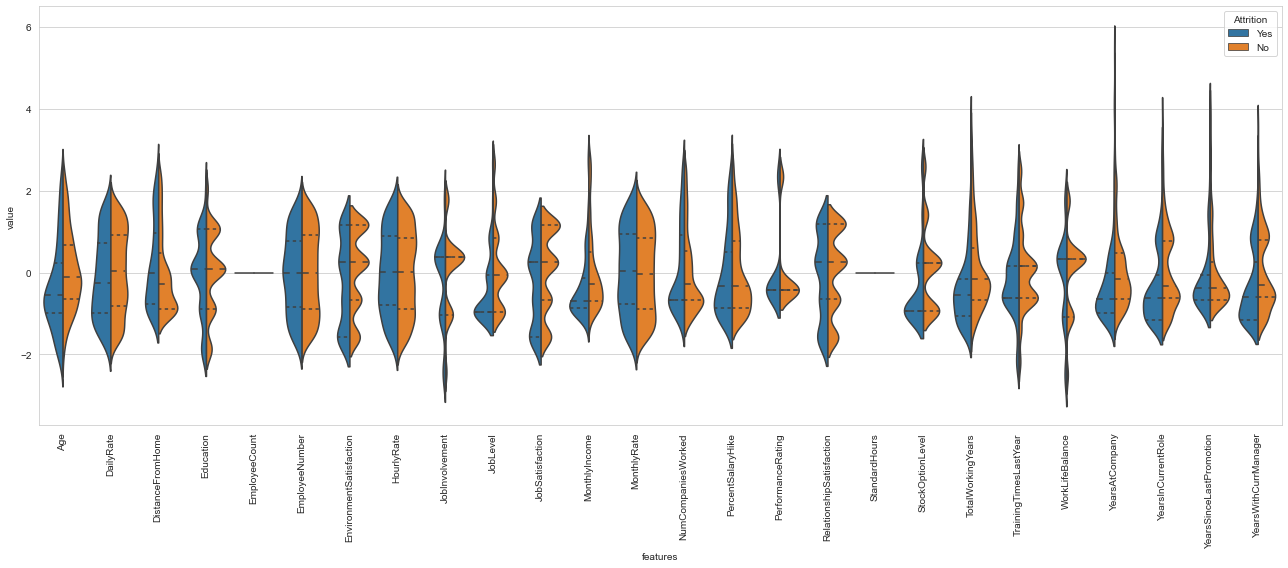

In [46]:
## Simple Plots

#numeric_data
# use scaled data for melt
attrition_status =   hr_data[hr_data.columns[1]]
numeric_data_w_attrition = pd.concat([attrition_status,df_features_scaled], axis=1)

#numeric_data_w_attrition.head()
sns.set_style('whitegrid')
plt.figure(figsize=(18,8))
data = pd.melt(numeric_data_w_attrition,id_vars="Attrition",var_name="features", value_name='value')
data.head()
sns.violinplot(x="features", y="value", hue="Attrition", data=data,split=True, inner="quart")
plt.xticks(rotation=90) 
plt.tight_layout()

  0%|          | 0/1643 [00:00<?, ?it/s]


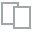
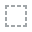
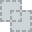
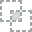
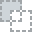
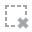
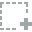
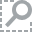
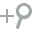
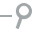
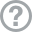
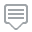
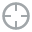
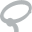
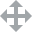
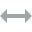
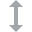
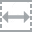
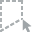
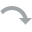
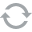
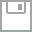
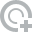
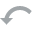
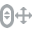
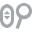
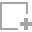
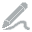
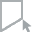
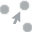
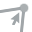
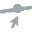

In [47]:
# use data prep package to explore data.
plot(hr_data)

In [48]:
#N=15
#first_n_column  = hr_data.iloc[: , :N]
#sns.pairplot(first_n_column, hue ='Attrition')
#plt.show()

In [49]:
#plt.figure(figsize = (60,60))
#sns.pairplot(hr_data, hue ='Attrition')
#plt.show()

In [50]:
#sns.pairplot(hr_data, hue ='Attrition')
#plt.show()


In [51]:
## Create an instance of the PairGrid class.
#grid = sns.PairGrid(data= hr_data,
#                    vars = ["Attrition"], size = 4)

In [52]:
corr = hr_data.corr()

corr.style.background_gradient(cmap='coolwarm')

C:\Users\ckitc\anaconda3\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\ckitc\anaconda3\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


##  Observations from corrplot 
The relationship between "soft measurements" of job satisfaction such as "work life balance", "performance", and "work life balance" have no apparent relationship with more measurable properties such as "age", "total years of employment", and "salary".  Time based measurements have the strongest correlations with other time based properties; such as "age", "time with current manager", "years at company", "years in current role", and "years since last promotion".  The realtionships between age and other time based measurements are very reasonable.  

In [53]:
hr_data.groupby(["Attrition"]).size()

Attrition
No     1233
Yes     237
dtype: int64

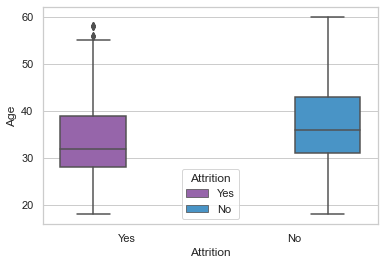

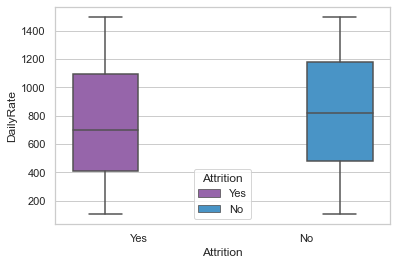

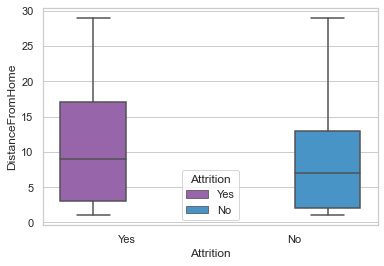

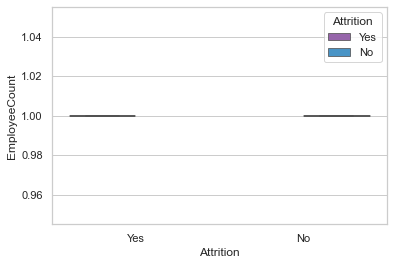

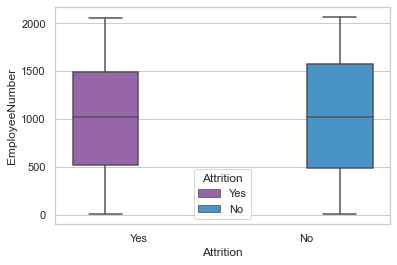

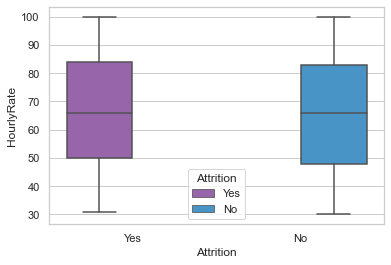

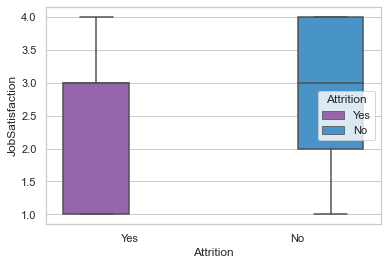

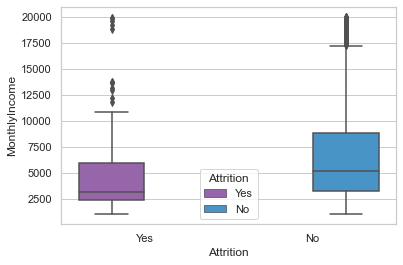

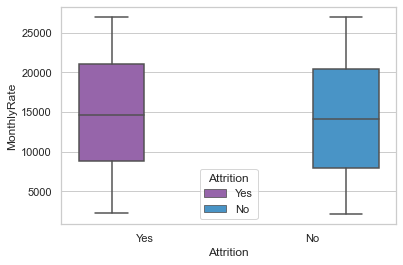

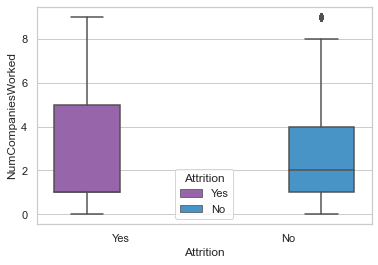

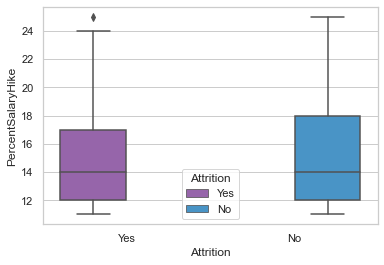

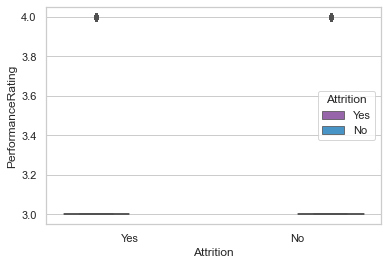

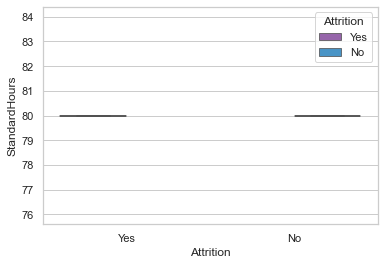

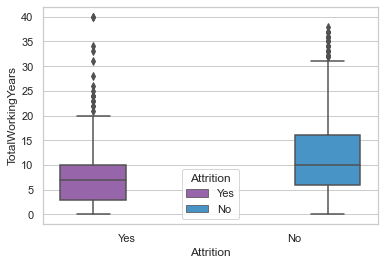

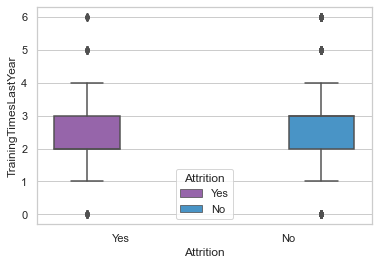

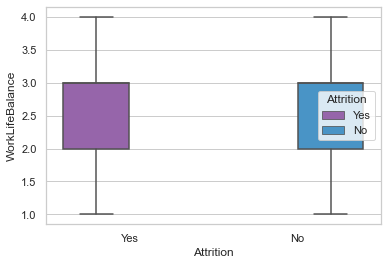

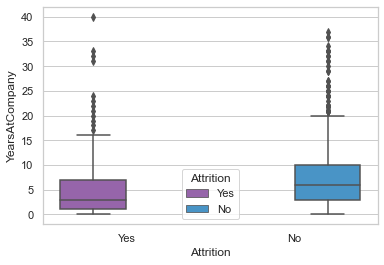

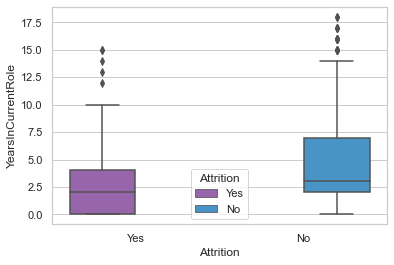

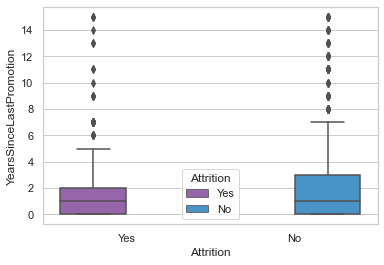

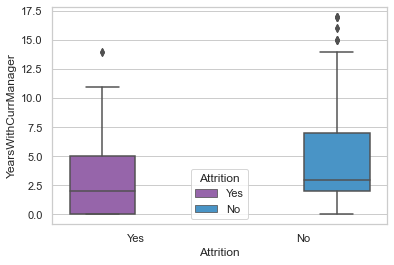

In [54]:
# Plot all of the continuous variables on box plots by our target response variable ("attrition").

import matplotlib.pyplot as plt

my_pal = {"Yes": "#9b59b6", "No": "#3498db"}

numeric_data = hr_data.select_dtypes(include='number')
sns.set(style="whitegrid")

for i, col in enumerate(numeric_data.columns):
    plt.figure(i)
    sns.boxplot(y=col,x="Attrition", data=raw_data, hue="Attrition", palette=my_pal)

## Observations from Exploratory Boxplots

Based on visual inspection without conducting statistical tests the following trends are apparent in the boxplots:
1. On average younger people attrite
2. Employees who attrite make less than those who stay (monthly). Likely due to the relationship between age and salary.
3. Employees who attrite live further from work
4. Job satisfaction is much lower in employees who attrite.
5. Resigning employees have fewer years of total experience than those who remain.
6. No apparent difference in work life balance.
7. Years since last promotion has some extreme outliers in the attrition group.  



In [55]:
#example plot, before setting up for loop
#sns.countplot(x="Attrition", data=hr_data, hue="Attrition", palette=my_pal)

In [56]:


#sns.countplot(x="Attrition", data=hr_data, hue="Attrition", palette=my_pal)

## Countplots by attrition group

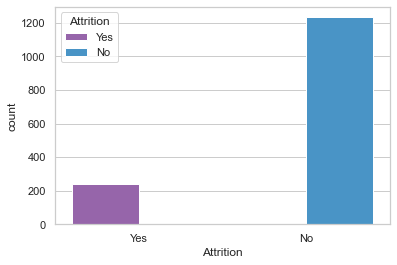

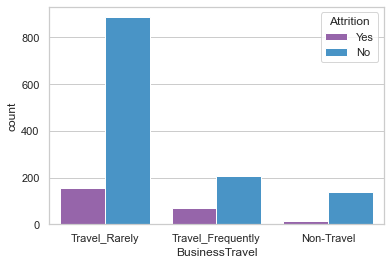

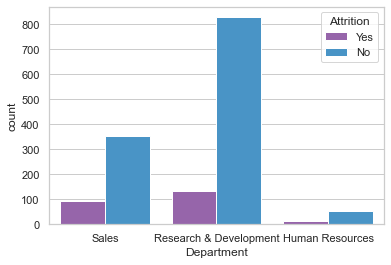

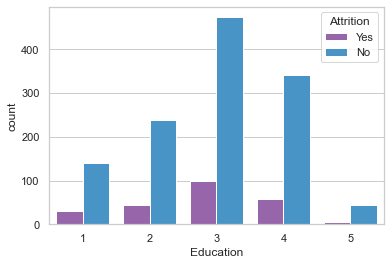

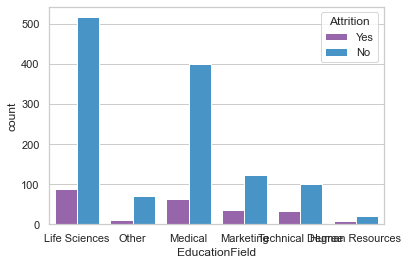

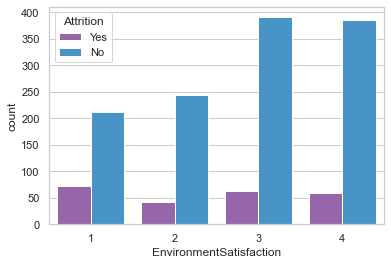

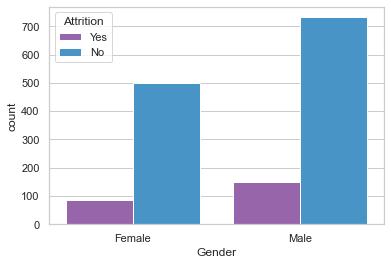

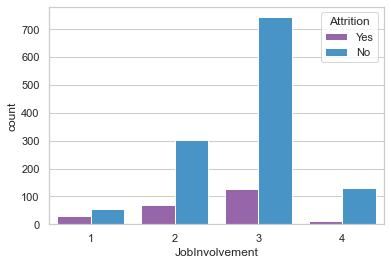

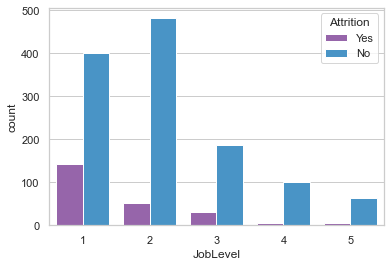

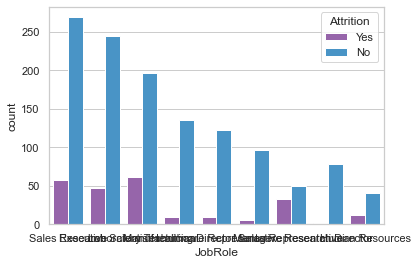

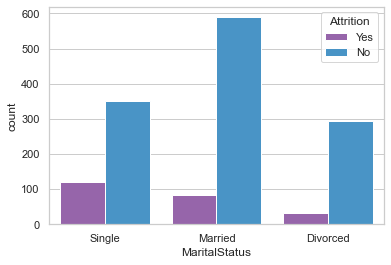

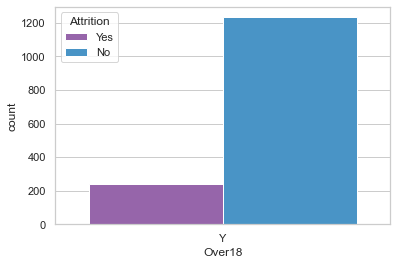

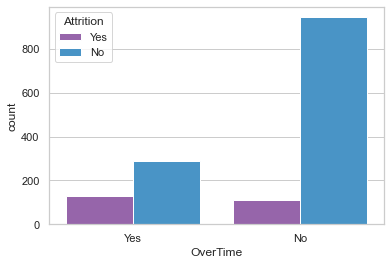

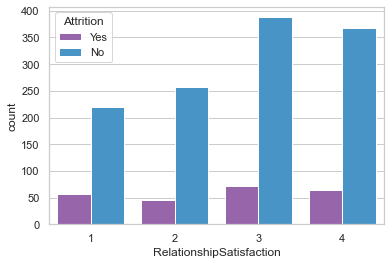

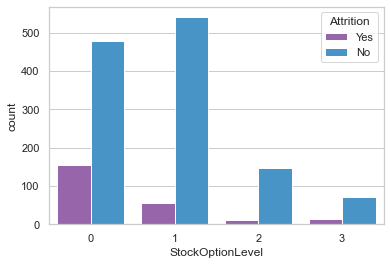

In [57]:
# look at count plots to determine which groups have the most individuals attrite.

categorical = hr_data.select_dtypes(exclude=['int64'])

for i, col in enumerate(categorical.columns):
    
    plt.figure(i)
    total=float(len(hr_data))
    #sns.set(rc = {'figure.figsize':(12,6)})

    ax=sns.countplot(x=col, data=raw_data, hue="Attrition", palette=my_pal)
  
    

## Observations from Count Plots

We will examine the countplots expressed as percents but first we will examine countplots for categorical variables divided by attrition status.

Observations:
1. 237 of 1233 employees have resigned (20%).  We don't know the time period that the data were collected over.
2. The most people who attrite travel rarely but it looks to be a smaller proportion than those who travel frequently. 
3. The most people who attrite are in R&D
4. Most of the people who attrite have a >= level 3 of Education.
5. Highest number of attriting individuals in life sciences
6. People who leave are mostly male
7. Most of the poeple who leave are in a level 1 role.  Most people who attrite are early career.
8.  Most of the people who attrite are single (count and percentage). This is likely related to age.
9. Most of the people who resign have no stock options.

Many of these relationships although true may not be representative when we rexamine attrition as a percent of each of the categorical variables. 






In [58]:
#test=(categorical
#.groupby('MaritalStatus')['Attrition']
#.value_counts(normalize=True)
#.mul(100)
#.rename('percent')
#.reset_index())
# 
#print(test.head())
##sns.catplot(test, x='MaritalStatus',y='percent',hue='Attrition',kind='bar',palette=my_pal)
#sns.barplot(x="MaritalStatus",y="percent", data=test, hue="Attrition", palette=my_pal)

## Barplots as a Percentage

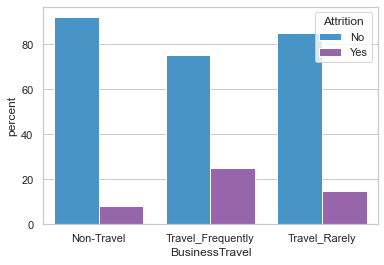

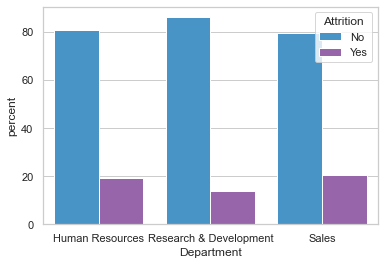

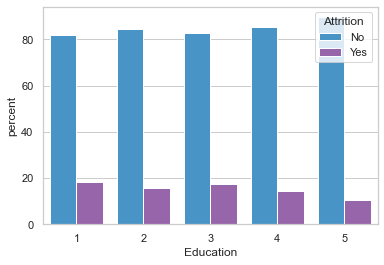

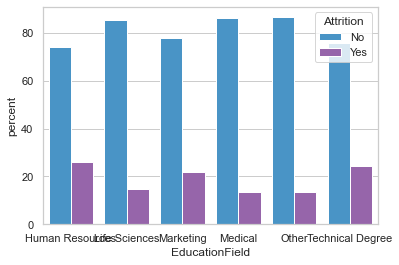

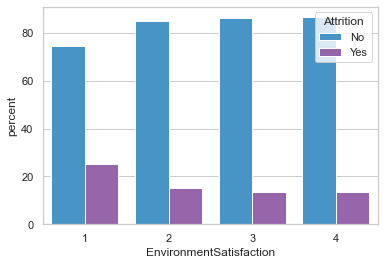

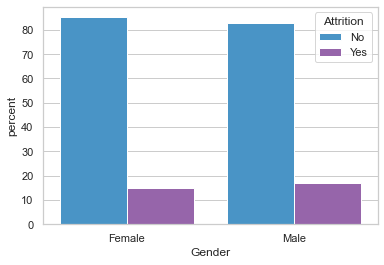

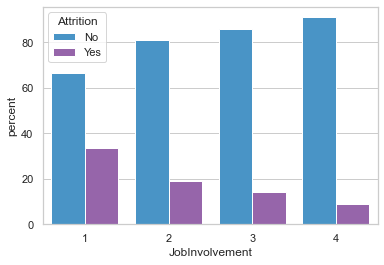

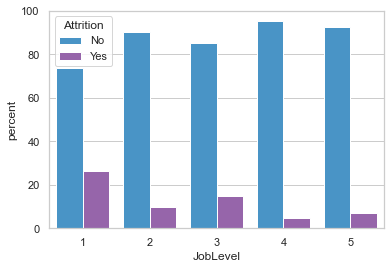

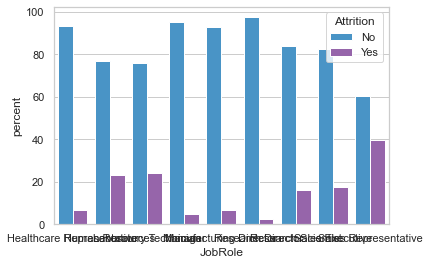

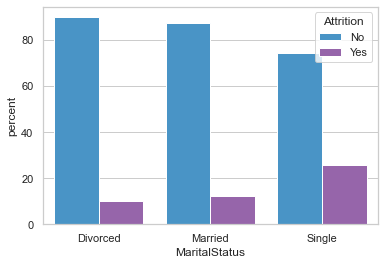

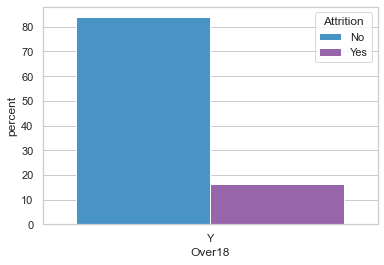

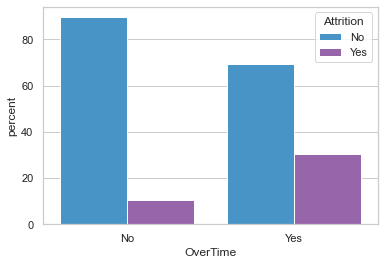

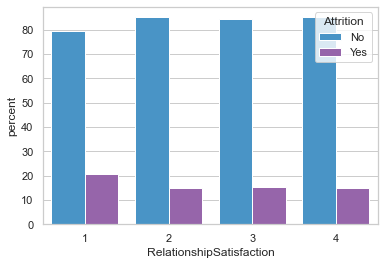

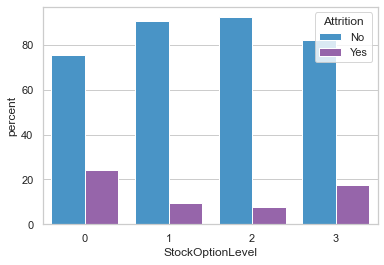

In [59]:
# Create Barplot of proportion of each categorical vaiable that has ATTRITED or REMAINED.

categorical = hr_data.select_dtypes(exclude=['int64'])

for i, col in enumerate(categorical.columns.drop("Attrition")):
    test=(categorical
    .groupby(col)['Attrition']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index())
 
    plt.figure(i)
    #sns.set(rc = {'figure.figsize':(12,6)})

    ax=sns.barplot(x=col,y='percent', data=test, hue='Attrition', palette=my_pal)

    


## Observations from Count Plots
For the same categorical variables as above we wille examine the percent of each variable by attrition group.

Observations from these figures:

Attrition is highest for employees that:

1. travel frequently
2. in sales (stable accroess disciplines)
3. Education level 1
4. Human resources, Marketing, and people with technical degrees
5. have low enviroment satisfaction (1)
6. Males (slightly, maybe not statistically significant)
7. low job involvement (30+ % attrition)
8. have a low job level
9. Sales Representatives (40%)
10. are single
11. Who work overtime
12. Have a low relationship satisfaction
13. Don't have stock options




## Boxplots of Categoricals vs Salary

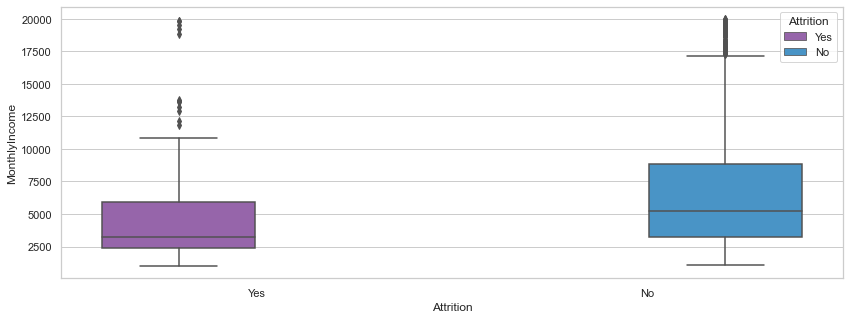

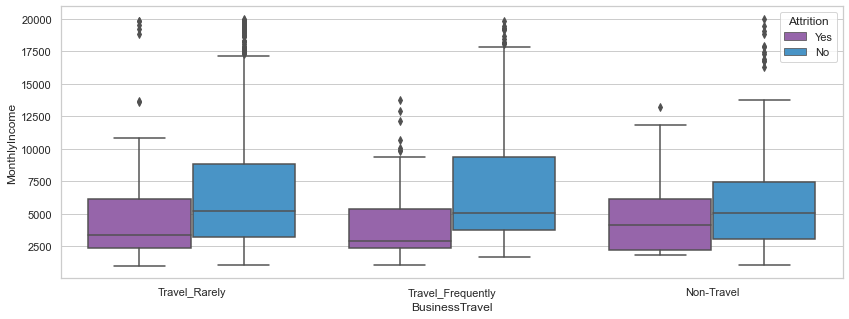

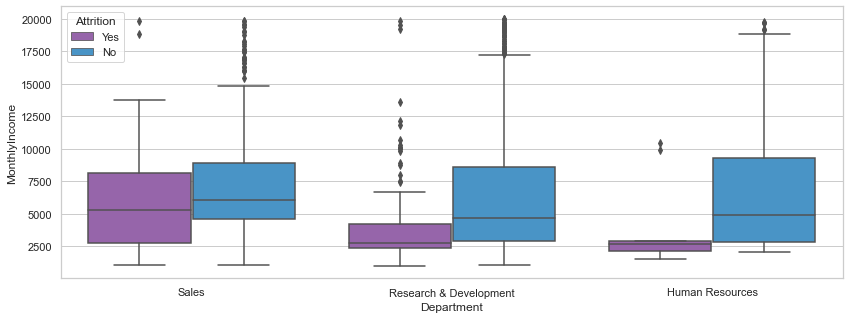

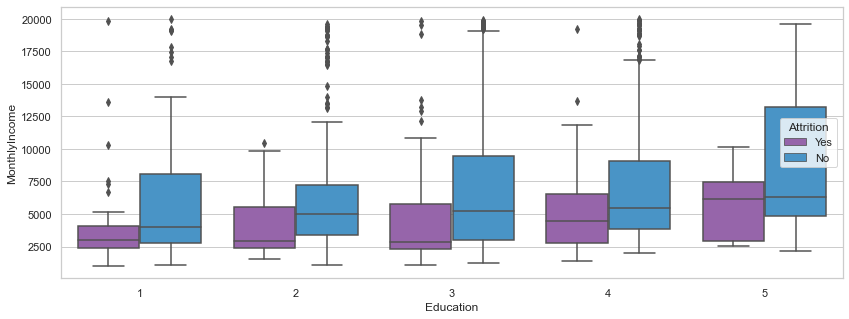

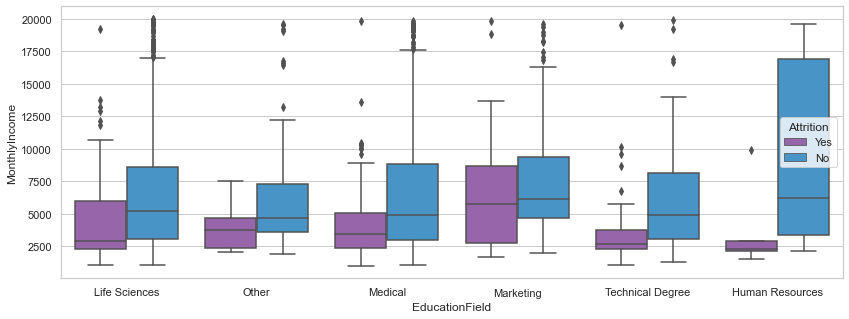

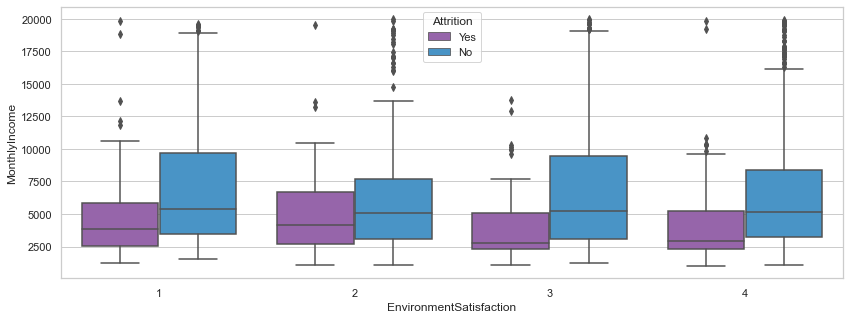

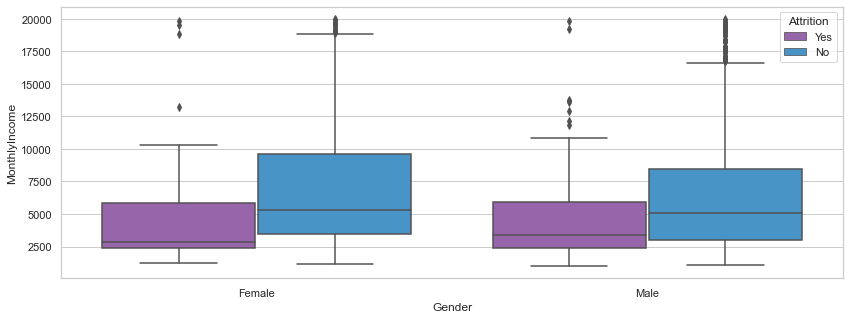

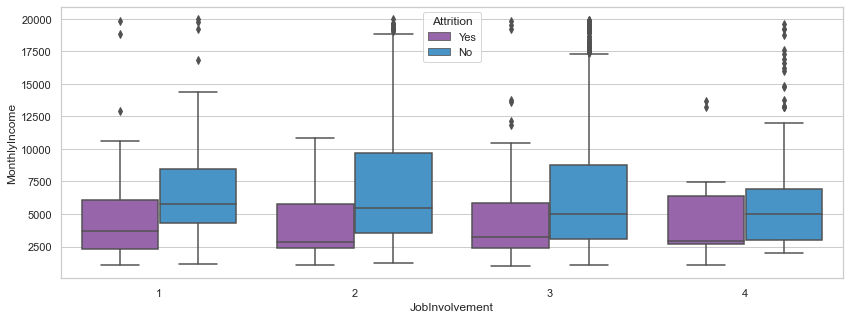

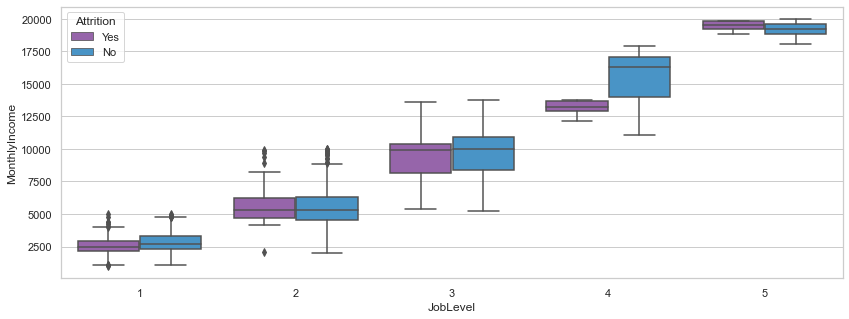

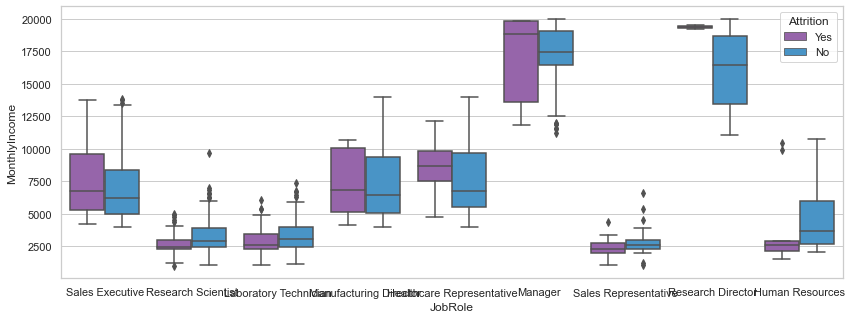

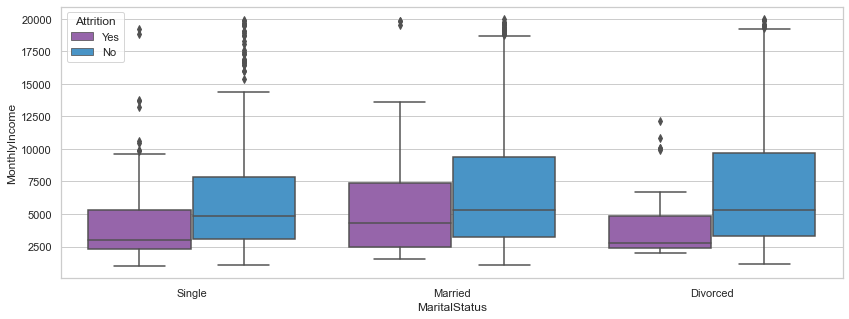

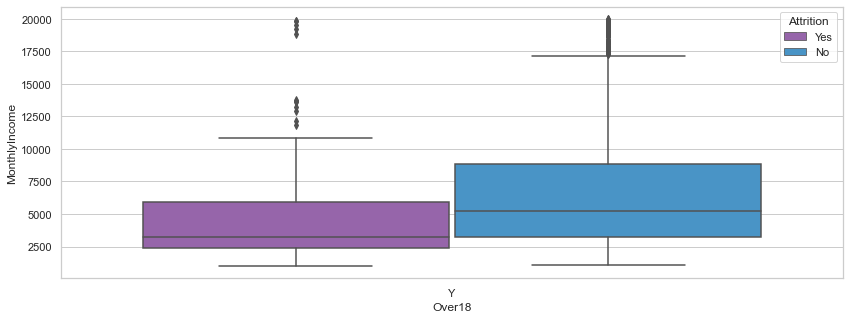

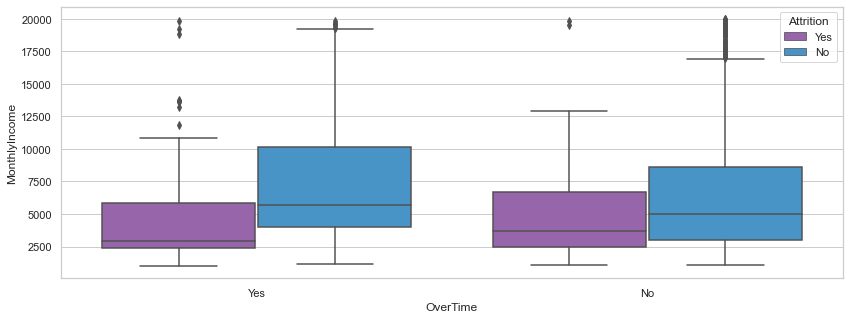

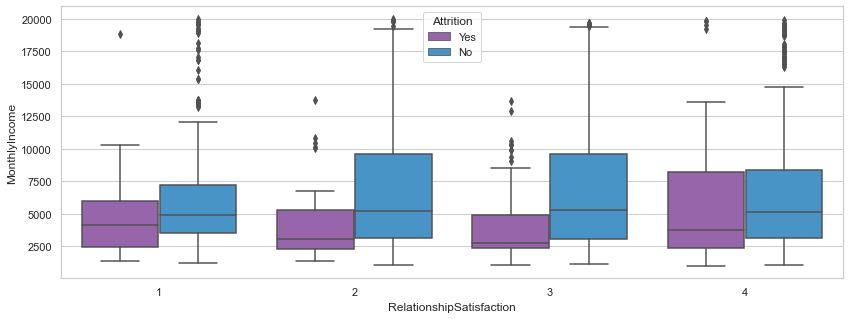

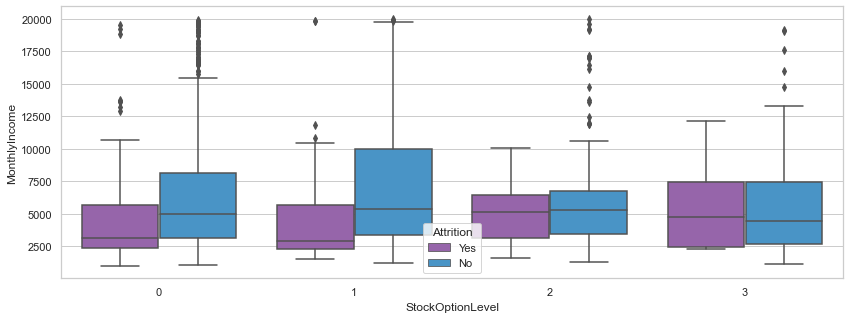

In [60]:
#Analyze Salary within each category.


import matplotlib.pyplot as plt

#categorical
sns.set(rc = {'figure.figsize':(14,5)})
sns.set(style="whitegrid")

for i, col in enumerate(categorical.columns):
    plt.figure(i)
    sns.boxplot(y="MonthlyIncome",x=col, data=raw_data, hue="Attrition", palette=my_pal)


### Observations from Salary countplots

1. Reasearch scientists, sales reps, and Human Resources are among the lowest paid departments.  Poeple who leave in these departments are on the low end of the scale.
2. Departing slaes executives, managers, manufacturing directors, and healthcare representatives earn more than their peers who remain.  These could constitute "top performers".
3. People with Stock Option 0 and 1 who attrite are at the low end of income compared to those who leave with options 3 and 4.

## Boxplots of Categoricals vs Age

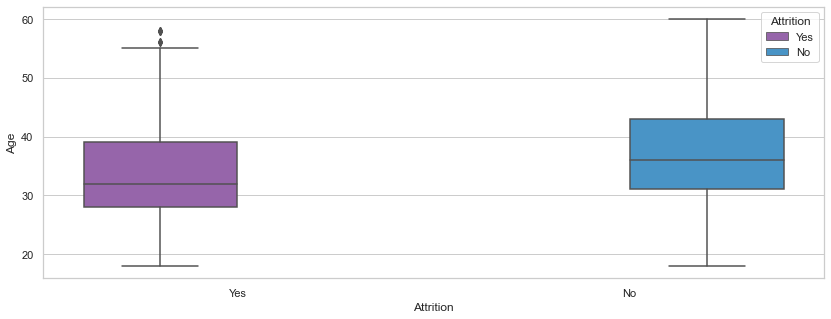

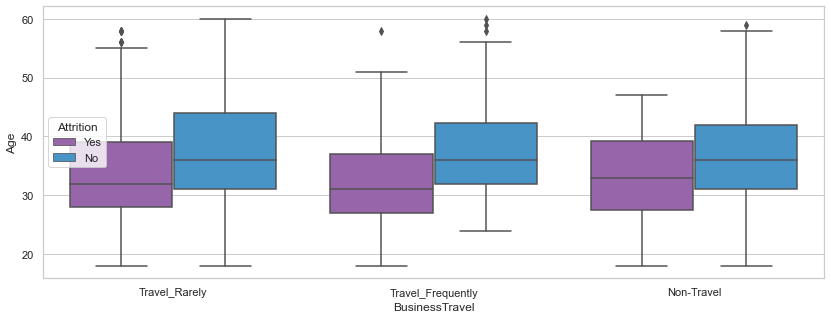

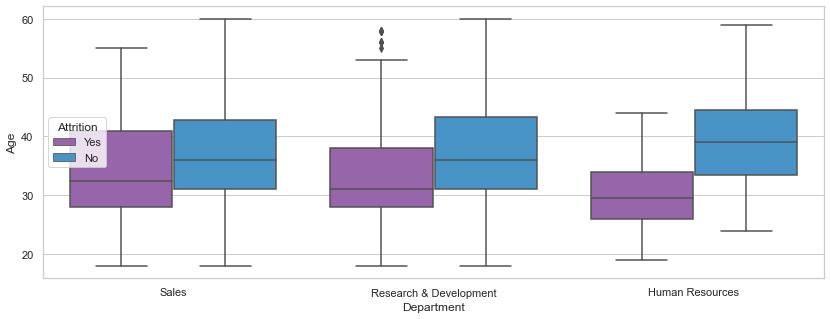

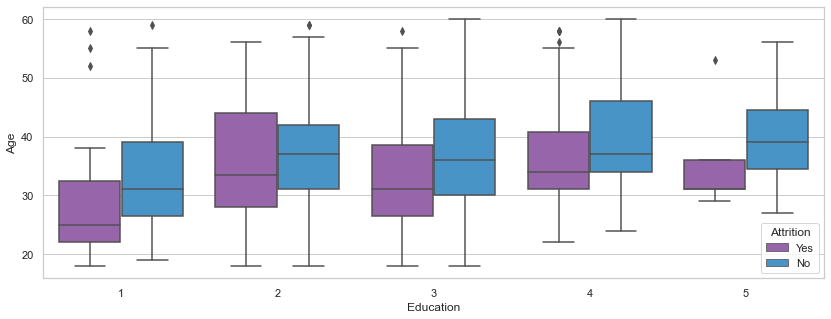

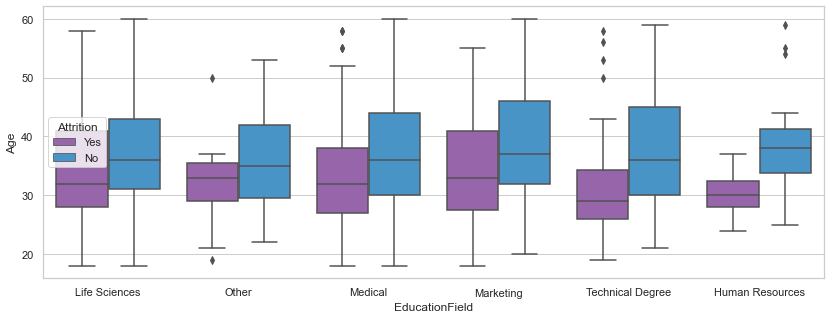

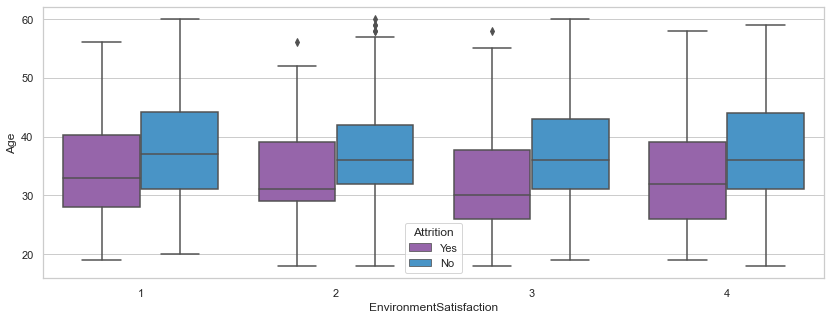

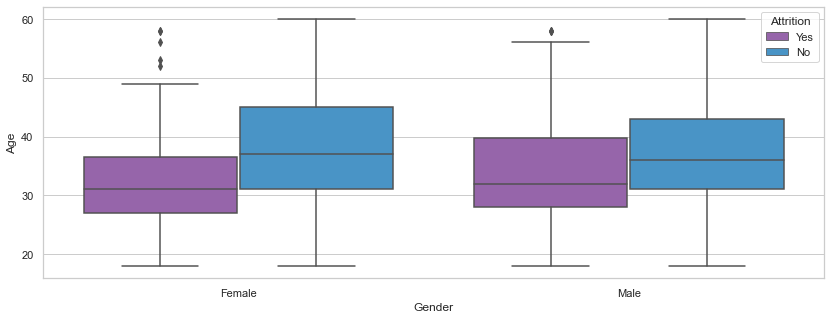

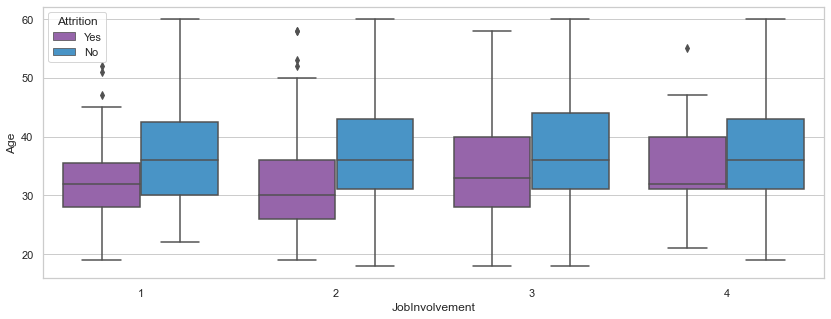

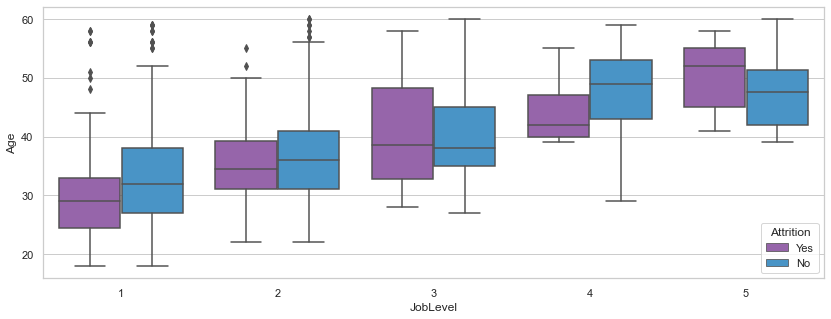

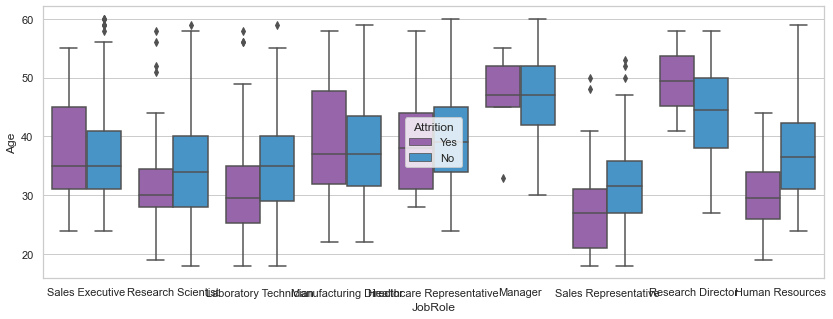

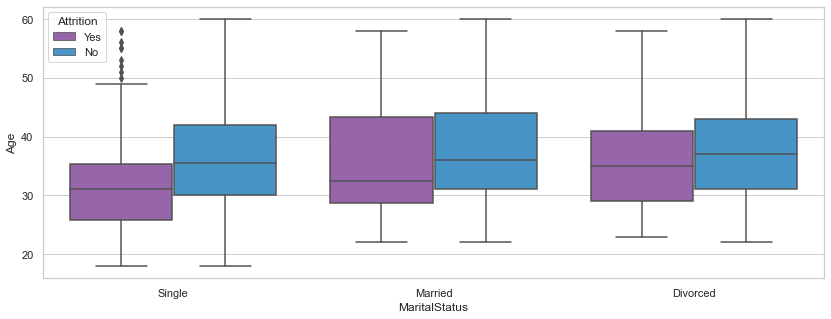

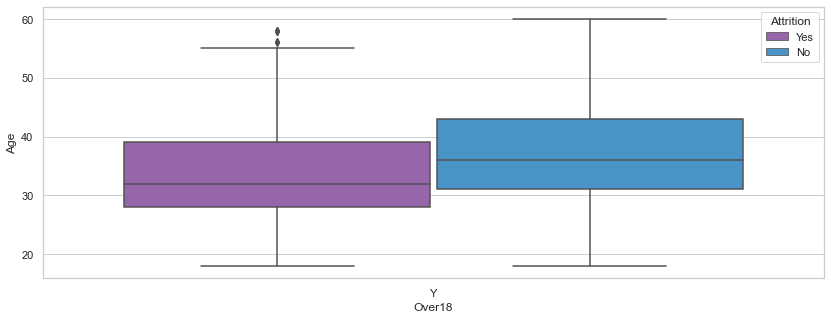

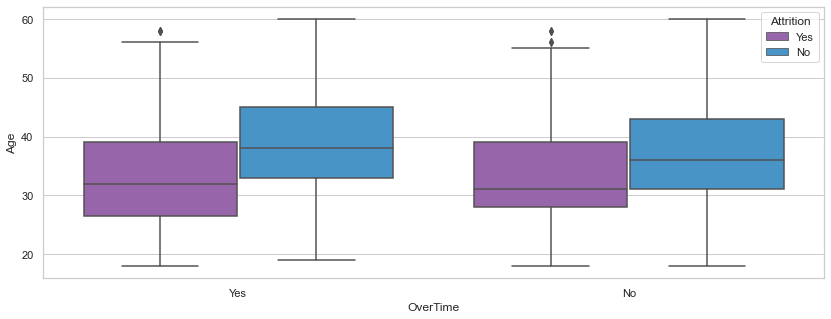

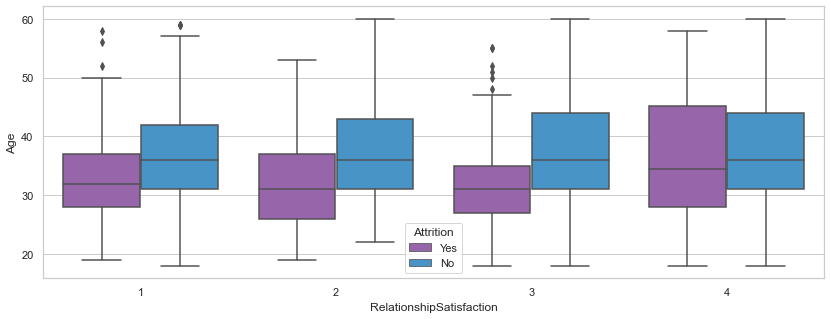

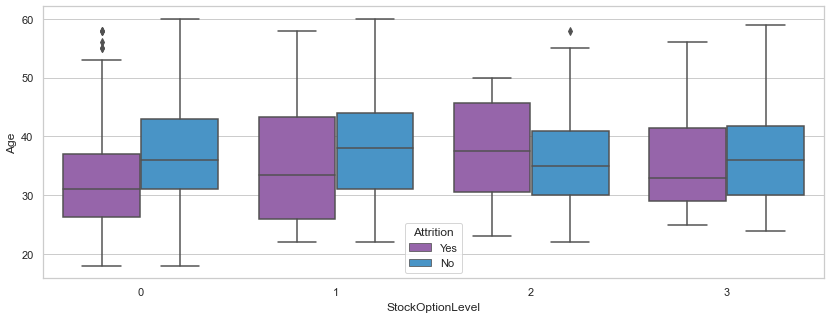

In [61]:
#Analyze AGE within each category.



#categorical
sns.set(rc = {'figure.figsize':(14,5)})
sns.set(style="whitegrid")

for i, col in enumerate(categorical.columns):
    plt.figure(i)
    sns.boxplot(y="Age",x=col, data=raw_data, hue="Attrition", palette=my_pal)

### Observations from AGE countplots

Peple who attrite are:
    1. Younger
    2. People in HR who leave are much younger than  those who stay in HR
    

## Boxplots of Categoricals vs DISTANCE FROM HOME

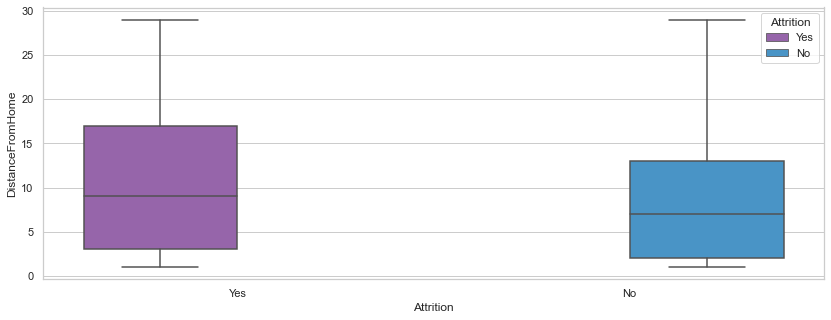

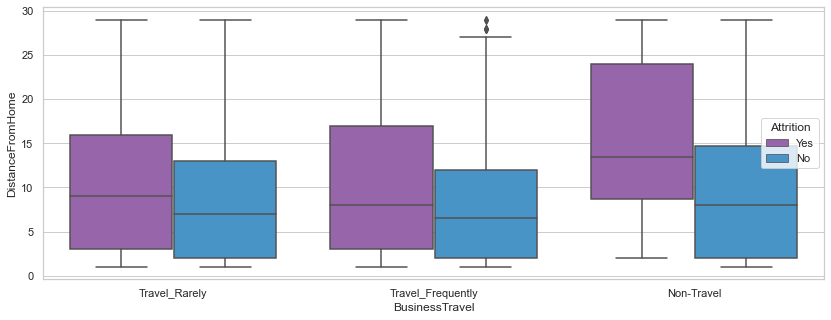

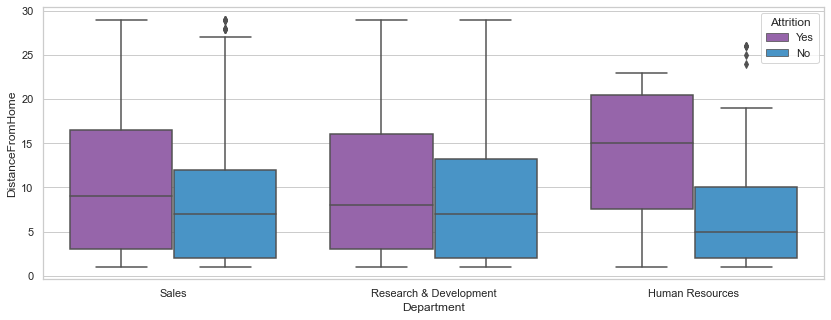

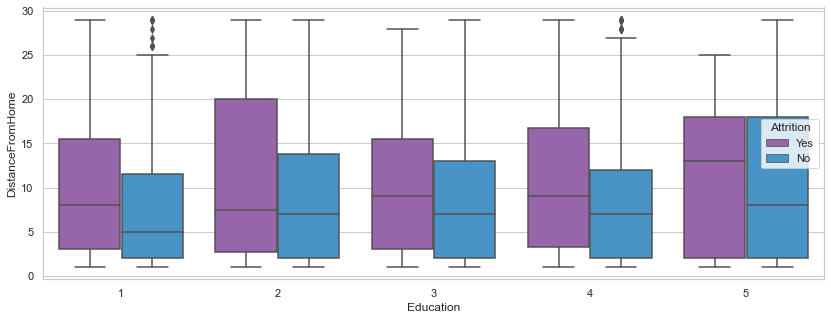

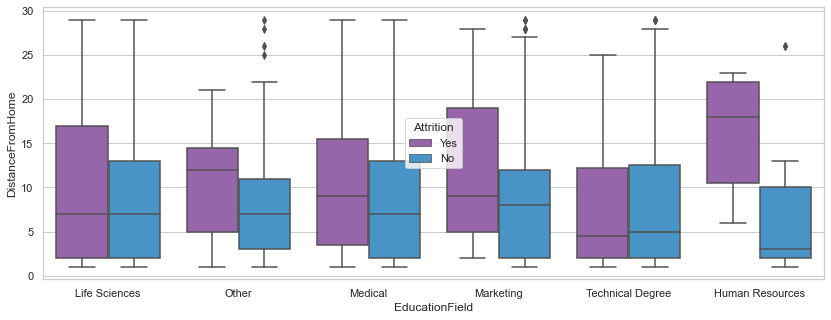

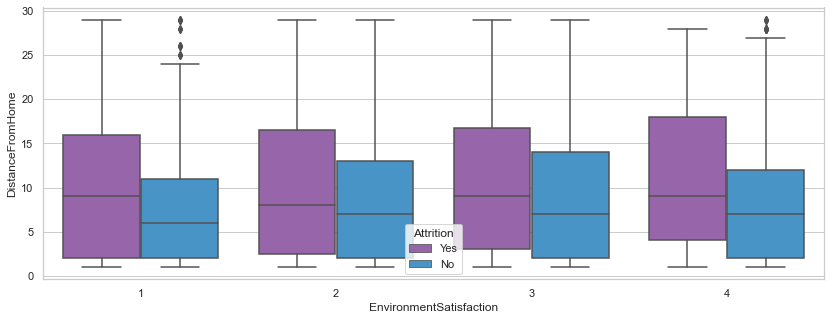

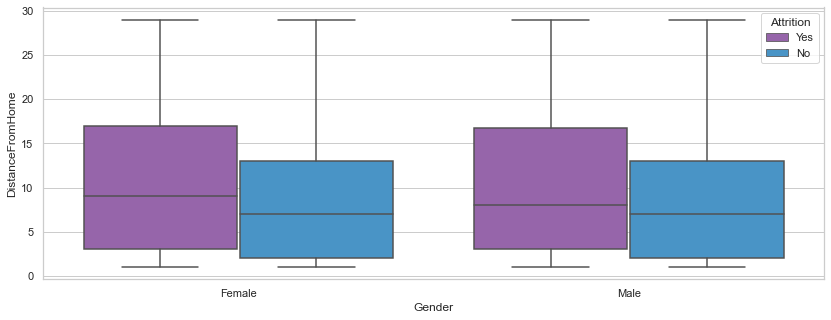

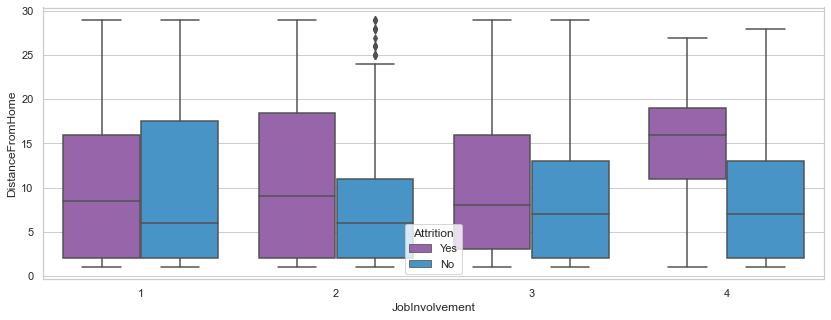

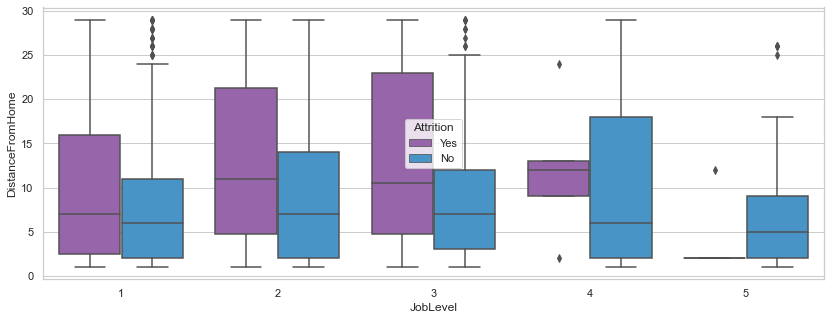

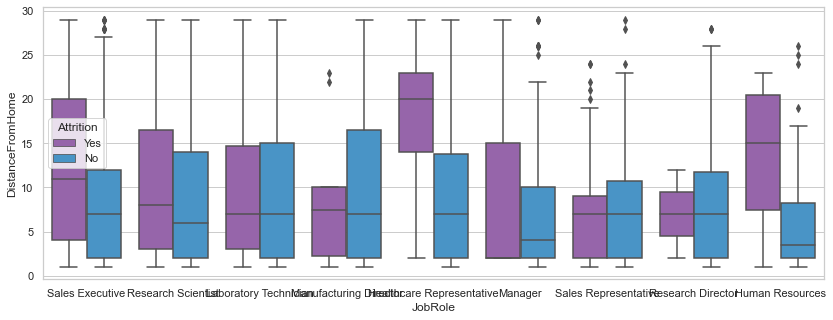

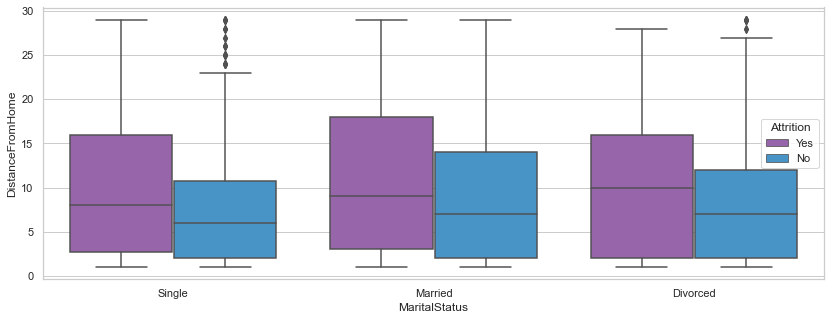

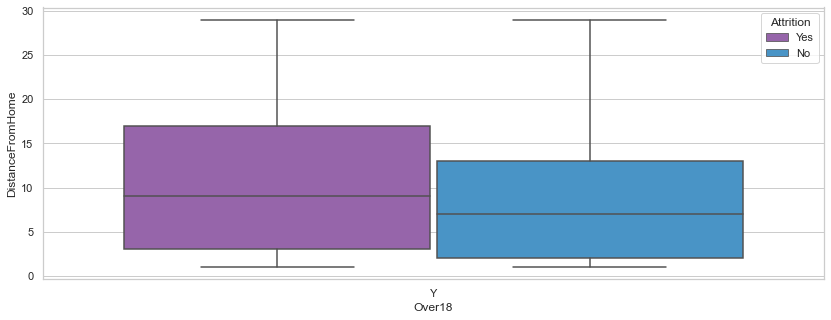

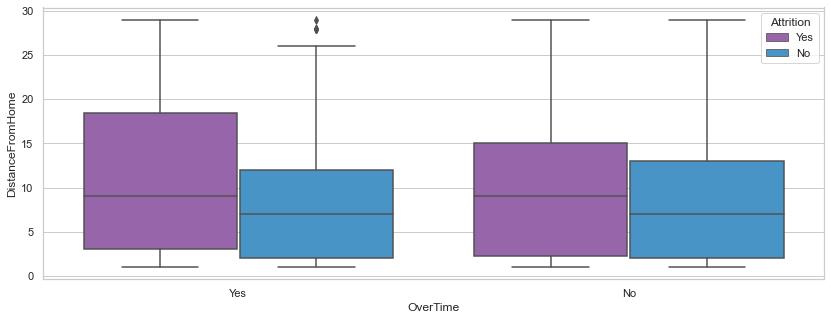

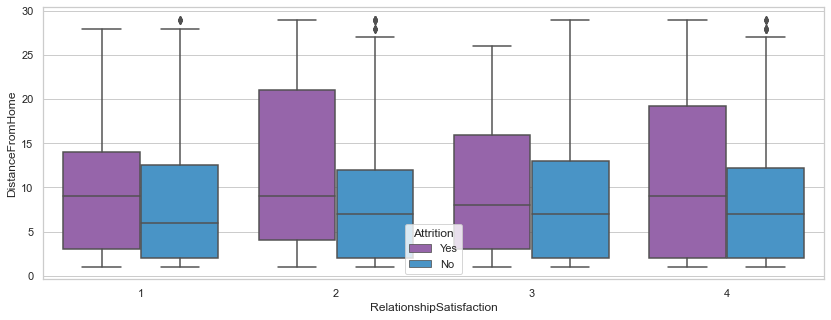

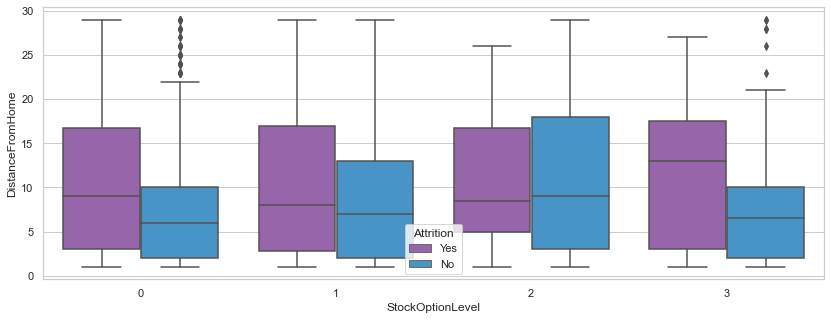

In [62]:

#categorical
sns.set(rc = {'figure.figsize':(14,5)})
sns.set(style="whitegrid")

for i, col in enumerate(categorical.columns):
    plt.figure(i)
    sns.boxplot(y="DistanceFromHome",x=col, data=raw_data, hue="Attrition", palette=my_pal)

### Boxplots of categoricals vs DISTANCE


### Observations

1.  The attrition group lives further from home. THis is particularly stark in the Non-travel group
2.  People in HR who leave the company live 50% further away than people in otehr departments who leave.
3.  People who attrition in healthcare live much further away. Possibly they have other option nearer to their home.



## Parallel Plot of continuous variables colored by attrition

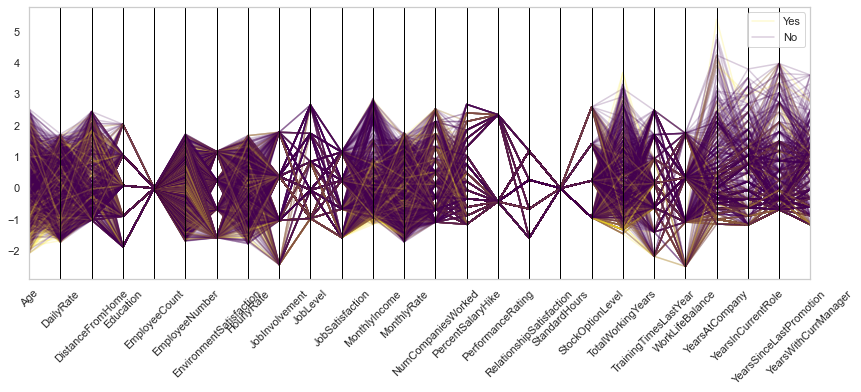

In [74]:
# libraries
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Take the iris dataset
import seaborn as sns
#data = sns.load_dataset('iris')

# Make the plot
parallel_coordinates(numeric_data_w_attrition, 'Attrition',alpha=.2, colormap=plt.get_cmap("viridis"), sort_labels=True)
#plt.xlabel('Variable', size = 15)
plt.xticks(rotation = 45)

plt.show()








## Observations of Parallel Plots

Although it was "a good idea at the time" there's not much to be learned from this plot.  
Next we will see if we ahve more luck using radar plots of mean parameters.



In [144]:
# Radar Plot by attrition
#radar plots using scaled data



numeric_data_w_attrition_mean= numeric_data_w_attrition.groupby(['Attrition']).mean()

numeric_data_w_attrition_mean=numeric_data_w_attrition_mean.reset_index(level=0)
numeric_data_w_attrition_mean.Attrition.replace(('Yes', 'No'), (1, 0), inplace=True)
numeric_data_w_attrition_mean=numeric_data_w_attrition_mean.drop(columns=["Attrition"])
numeric_data_w_attrition_mean.head()

#numeric_data_w_attrition.describe()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0  0.069799   0.024837         -0.034163   0.013755            0.0   
1 -0.363132  -0.129218          0.177736  -0.071558            0.0   

   EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0        0.004637                 0.045319    0.003001        0.057002   
1       -0.024126                -0.235775   -0.015614       -0.296554   

   JobLevel  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  0.074139  ...                  0.020111            0.0          0.060127   
1 -0.385712  ...                 -0.104630            0.0         -0.312815   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0           0.074998               0.026076         0.028032        0.058921   
1          -0.390179              -0.135663        -0.145839       -0.306536   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.070387                 0.014476              0.068481  
1           -0.366188                -0.075313             -0.356276  

[2 rows x 26 columns]

In [146]:
#radar plots by means
#https://coderzcolumn.com/tutorials/data-science/how-to-plot-radar-charts-in-python-plotly
import plotly.express as px
fig = px.line_polar(
                    r=numeric_data_w_attrition_mean.loc[0].values,
                    theta=numeric_data_w_attrition_mean.columns,
                    line_close=True,
                    range_r = [-.5,.15]
                    )


fig.show()

In [147]:
#radar plots by means
#https://coderzcolumn.com/tutorials/data-science/how-to-plot-radar-charts-in-python-plotly
import plotly.express as px
fig = px.line_polar(
                    r=numeric_data_w_attrition_mean.loc[1].values,
                    theta=numeric_data_w_attrition_mean.columns,
                    line_close=False,
                    range_r = [-.5,.15]
                    )


fig.show()

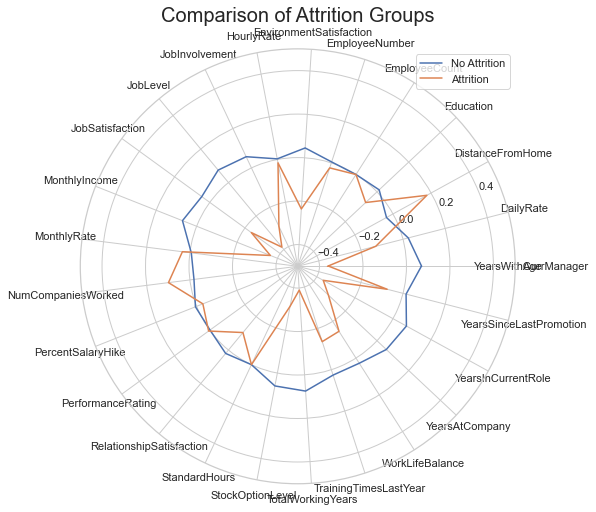

In [150]:
# Create combined Radar plot in matplot lib

categories = numeric_data_w_attrition_mean.columns

no_attrition = numeric_data_w_attrition_mean.loc[0].values
attrition = numeric_data_w_attrition_mean.loc[1].values

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(no_attrition))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, no_attrition, label='No Attrition')
plt.plot(label_loc, attrition, label='Attrition')
plt.title('Comparison of Attrition Groups', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.ylim([-.5, .5])
plt.legend()
plt.show()


## Observations from Radar Plots

The radar plots compares the means of the standaradrized values of all conitnuous columns in the data set.  The values were standardized so the mean of each column is 0.  The "No attrition" group accounts for ~80% of the total, therefore most columns are centered around 0.

There are some key differences in the two groups that match our observations in the previous plots.

1. Monthly rate, stock options, monthly income, job satisfaction, job level, Environment satisfaction, age, and total working years are all significantly lower the no-attrition group.

2. Distance from home and Number of companies worked are higher than the no-attrition group. 

Most of the people who leave are younger, unhappy with work, live further from home, and/or have left other companies before.



In [ ]:
# Experiment with imputation methods

Additional questions:
    Which gender has the highest attrition
    Which Role has the highest % attrition
    Salary by department and role
    Analyze the properties of people who are sales representatives (v high attrition) 
    Analyze the people who attrite that have stock option 3 (stale?)
    Are we dsitinguishing between retirements and attrition?
    